# Using Heatmaps to Find Patterns in Flight Passengers' Data

<b> Use pandas to read the flight_details.csv dataset </b>

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# load the data
data = pd.read_csv('Datasets/flight_details.csv')
data.head()

,Years,Months,Passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [3]:
# transform the data into a format that is suitable for heatmaps
data = data.pivot('Months', 'Years', 'Passengers')
data = data.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [4]:
data

Years,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Months,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


<b> Use a heatmap to visualize the given data </b>

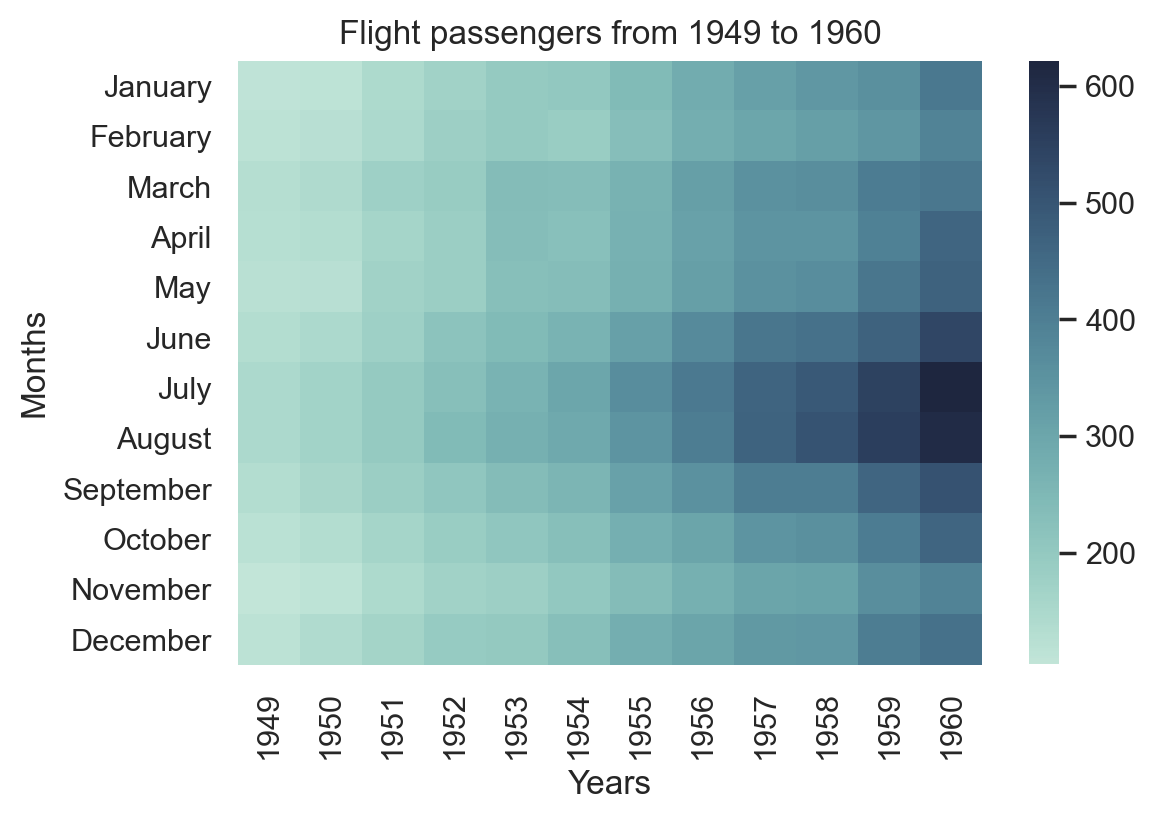

In [5]:
plt.figure(dpi=200)
sns.heatmap(data, cmap=sns.cubehelix_palette(rot=-0.3, as_cmap=True))
plt.title('Flight passengers from 1949 to 1960')
plt.show()

# Movie Comparison Revisited

<b> Use pandas to read the movie_scores.csv dataset </b>

In [6]:
data = pd.read_csv('Datasets/movie_scores.csv', index_col=0)
data

,MovieTitle,Tomatometer,AudienceScore
0,The Shape of Water,91,73
1,Black Panther,97,79
2,Dunkirk,92,81
3,The Martian,91,91
4,The Hobbit: An Unexpected Journey,64,83


<b> Transform the data into a useable format for Seaborn's barplot function </b>

In [7]:
movie_scores = pd.DataFrame({'Movie Title':list(data['MovieTitle']) * 2, 
                            'Score': list(data['AudienceScore']) + list(data['Tomatometer']),
                            'Type': ['AudienceScore'] * len(data['AudienceScore']) + ['Tomatometer'] * len(data['Tomatometer'])})

In [8]:
movie_scores

,Movie Title,Score,Type
0,The Shape of Water,73,AudienceScore
1,Black Panther,79,AudienceScore
2,Dunkirk,81,AudienceScore
3,The Martian,91,AudienceScore
4,The Hobbit: An Unexpected Journey,83,AudienceScore
5,The Shape of Water,91,Tomatometer
6,Black Panther,97,Tomatometer
7,Dunkirk,92,Tomatometer
8,The Martian,91,Tomatometer
9,The Hobbit: An Unexpected Journey,64,Tomatometer


<b> Use Seaborn to create a visually appealing bar plot that compares the two scores for all five movies </b>

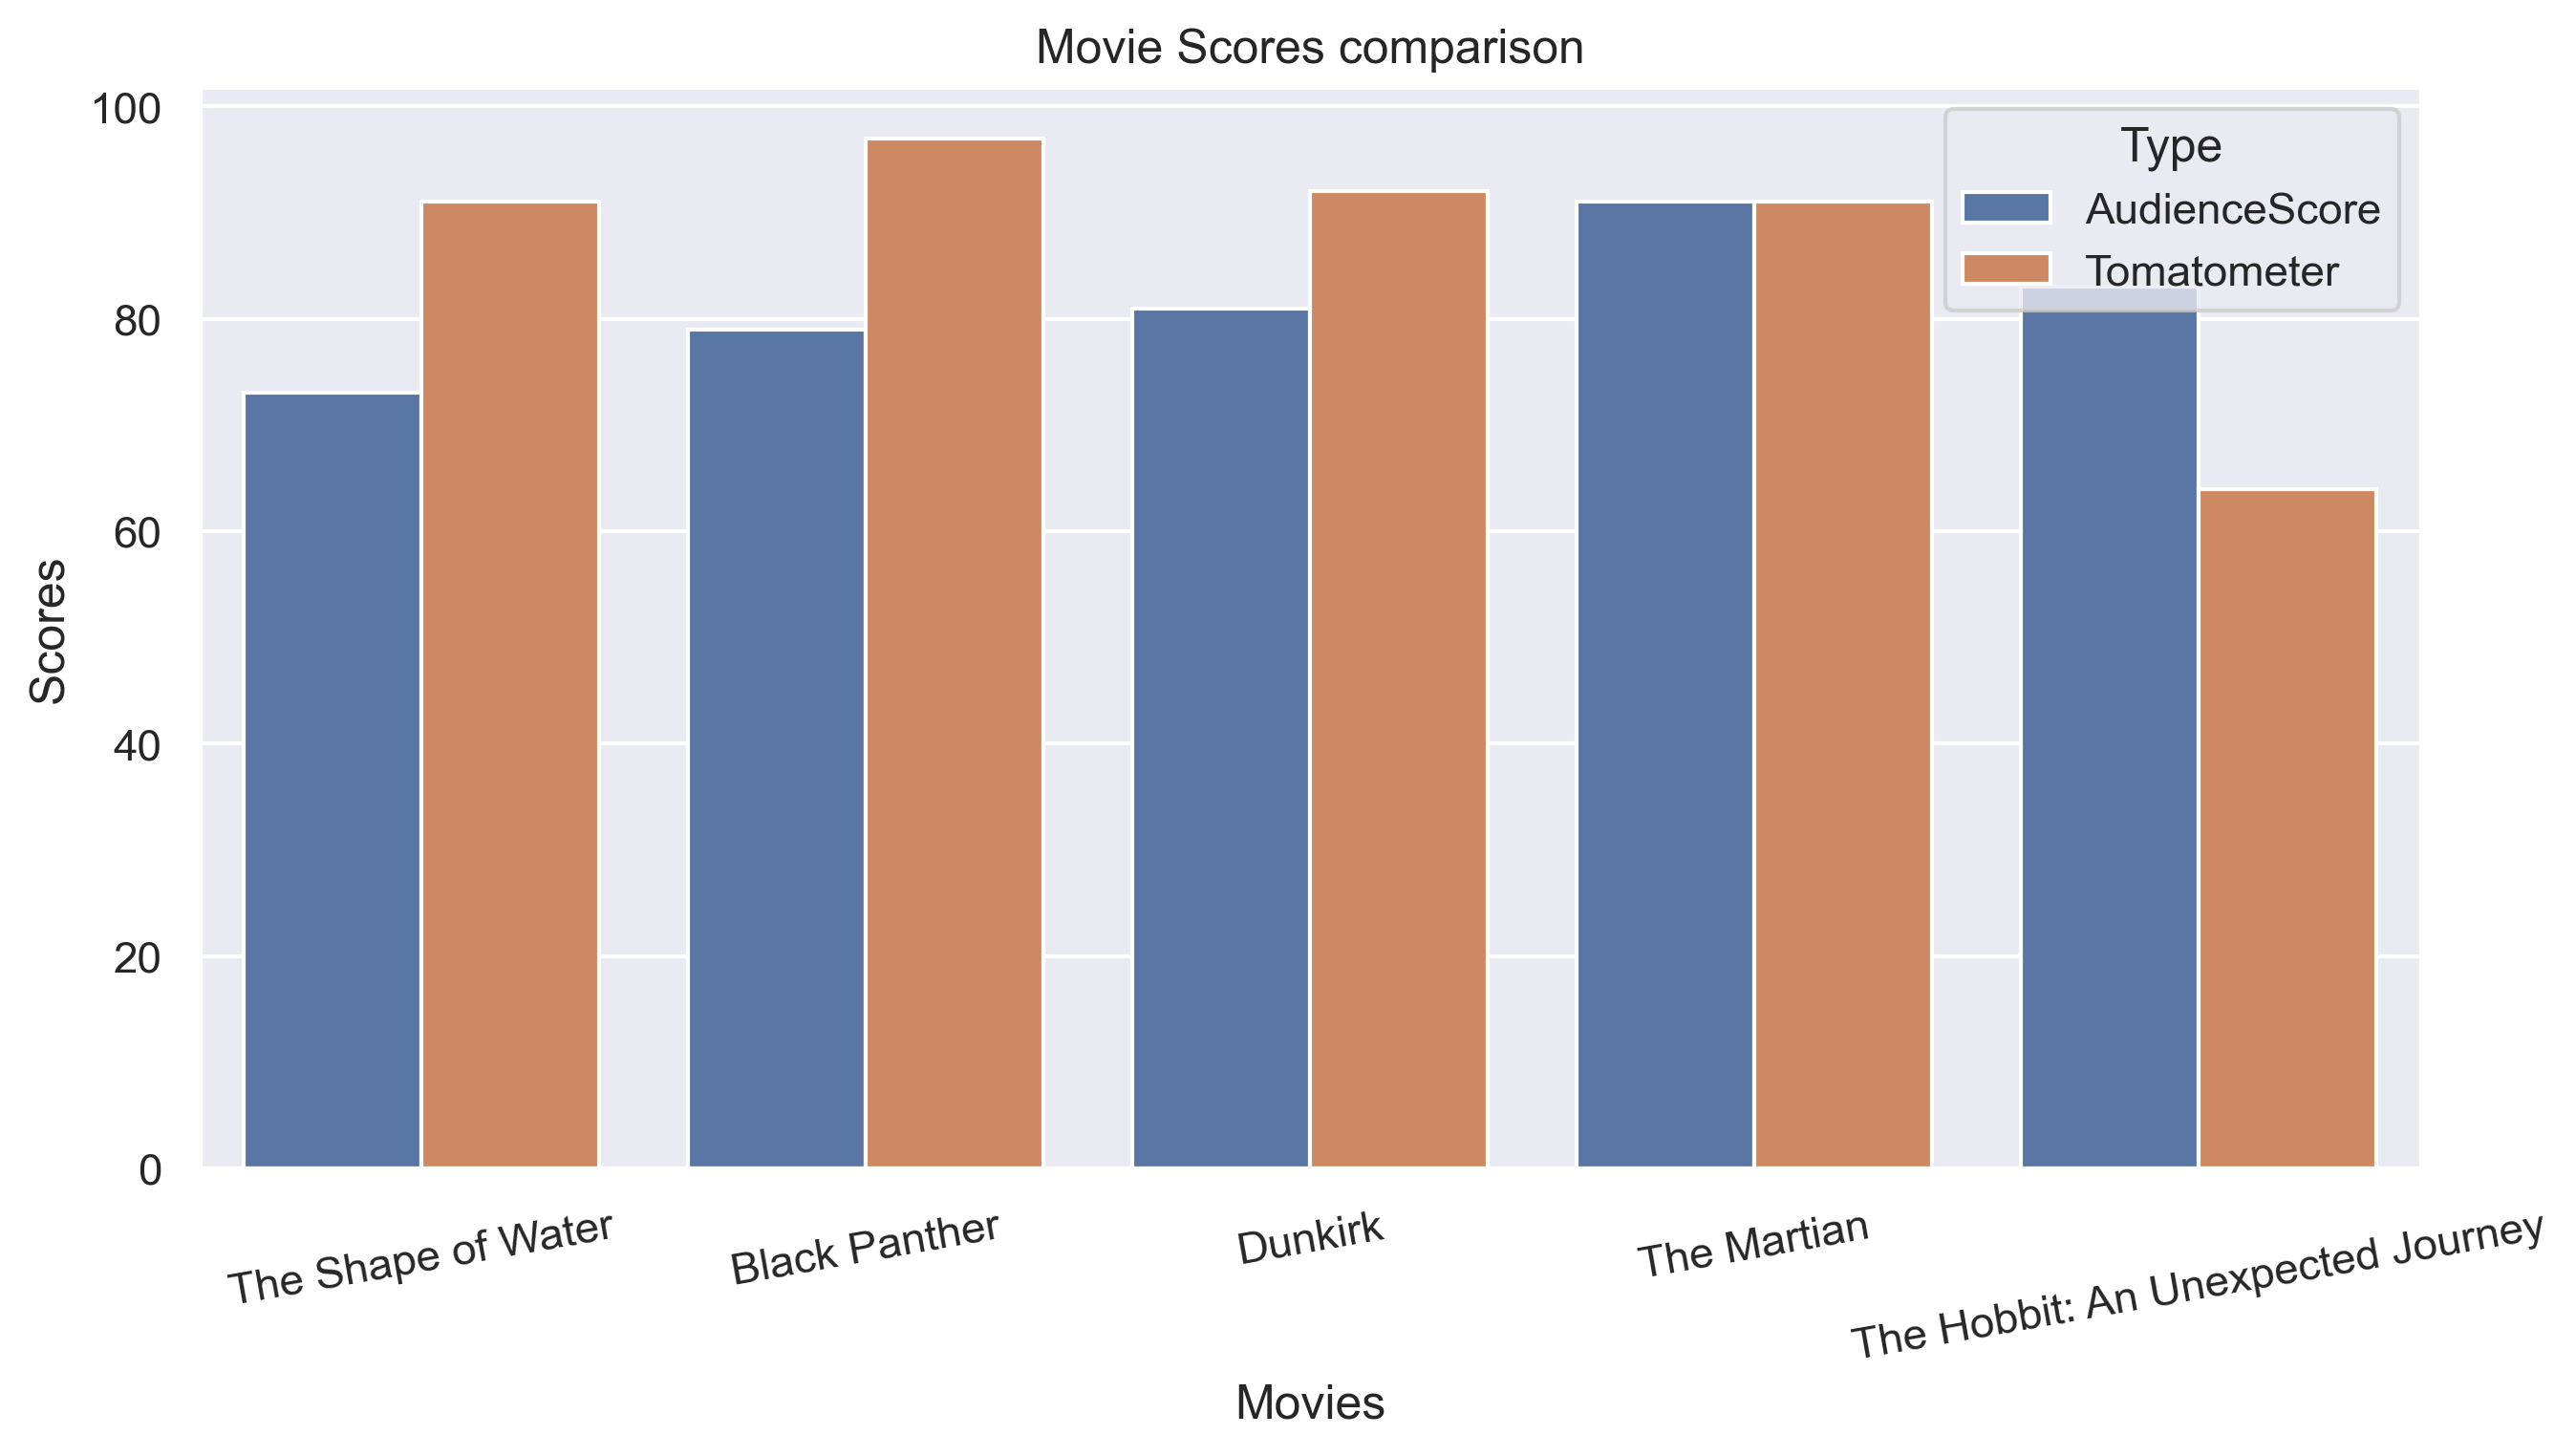

In [9]:
plt.figure(figsize=(10, 5), dpi=300)
ax = sns.barplot('Movie Title', 'Score', hue='Type', data=movie_scores)
plt.xticks(rotation=10)
plt.title('Movie Scores comparison')
plt.xlabel('Movies')
plt.ylabel('Scores')
plt.show()

# Comparing IQ Scores for Different Test Groups by Using a Violin Plot

<b> Use pandas to read the iq_scores.csv dataset </b>

In [10]:
data = pd.read_csv('Datasets/iq_scores.csv')
data.head()

,group_a,group_b,group_c,group_d
0,118,126,108,93
1,103,89,89,99
2,125,90,114,91
3,107,101,116,110
4,111,102,126,80


In [11]:
# Access the data of each group in the column, convert it into a list, and assign appropriate variables
group_a = data[data.columns[0]].tolist()
group_b = data[data.columns[1]].tolist()
group_c = data[data.columns[2]].tolist()
group_d = data[data.columns[3]].tolist()

<b> Create a pandas DataFrame from the data for each respective group </b>

In [12]:
data = pd.DataFrame({'Groups': ['Group A'] * len(group_a) +
                    ['Group B'] * len(group_b) +
                    ['Group C'] * len(group_c) +
                    ['Group D'] * len(group_d),
                    'IQ scores': group_a + group_b + group_c + group_d})

In [13]:
data

,Groups,IQ scores
0,Group A,118
1,Group A,103
2,Group A,125
3,Group A,107
4,Group A,111
...,...,...
395,Group D,105
396,Group D,74
397,Group D,85
398,Group D,85


<b> Create a violin plot for the IQ scores of the different test groups </b>

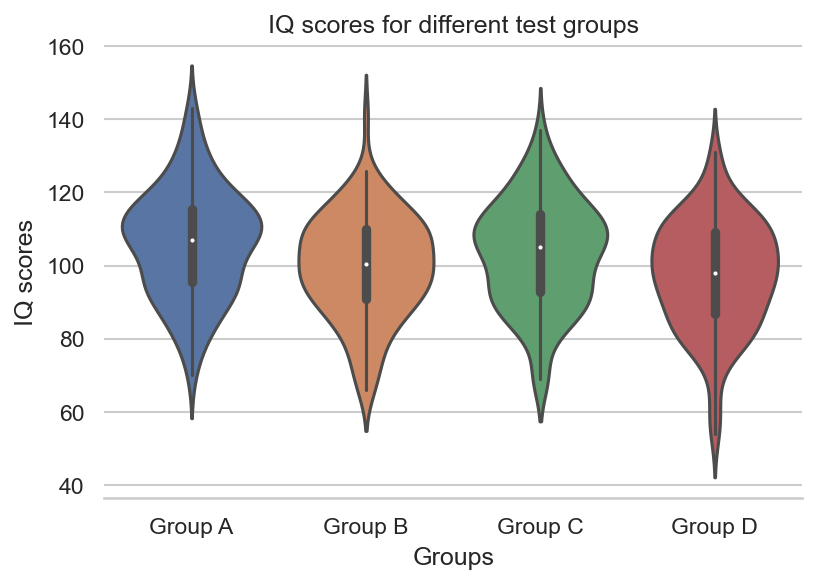

In [14]:
plt.figure(dpi=150)
sns.set_style('whitegrid')
sns.violinplot('Groups', 'IQ scores', data=data)
sns.despine(left=True, right=True, top=True)
plt.title('IQ scores for different test groups')
plt.show()

# Visualizing the Top 30 Music YouTube Channels Using Seaborn's FacetGrid

<b> Use pandas to read the YouTube.csv dataset </b>

In [15]:
data = pd.read_csv('Datasets/YouTube.csv')
data.head()

,Channel,Subs (in millions),Views (in millions)
0,T-Series,123.0,94410
1,Canal KondZilla,54.5,27860
2,Zee Music Company,48.5,22689
3,Ed Sheeran,43.2,18905
4,EminemMusic,40.2,773


<b> Access the data of each group in the column, convert this into a list, and assign this list to variables of each respective group </b>

In [16]:
channels = data[data.columns[0]].tolist()
subs = data[data.columns[1]].tolist()
views = data[data.columns[2]].tolist()

<b> Create a pandas DataFrame with the preceding data </b>

In [17]:
data = pd.DataFrame({'YouTube Channels': channels + channels,
                    'Subscribers in Millions': subs + views,
                    'Type': ['Subscribers'] * len(subs) + ['Views'] * len(views)})

In [18]:
data

,YouTube Channels,Subscribers in Millions,Type
0,T-Series,123.0,Subscribers
1,Canal KondZilla,54.5,Subscribers
2,Zee Music Company,48.5,Subscribers
3,Ed Sheeran,43.2,Subscribers
4,EminemMusic,40.2,Subscribers
5,Ariana Grande,39.3,Subscribers
6,Taylor Swift,36.8,Subscribers
7,JustinBieberVEVO,33.1,Subscribers
8,BLACKPINK,32.4,Subscribers
9,Alan Walker,31.7,Subscribers


<b> Create a FacetGrid with two columns to visualize the data </b>

C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


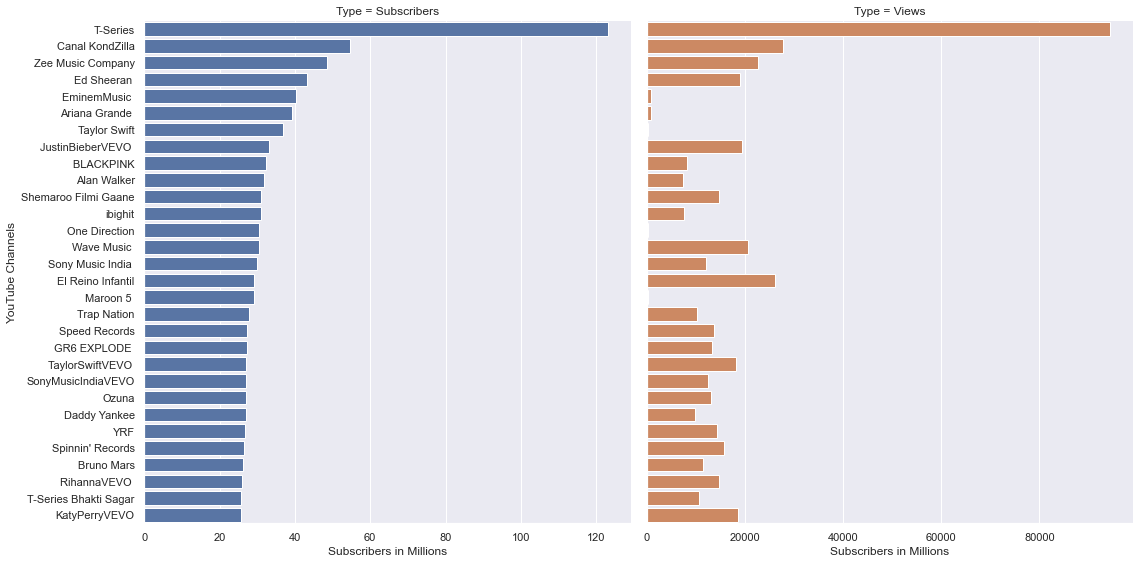

In [19]:
sns.set()
g = sns.FacetGrid(data, col='Type', hue='Type', sharex=False, height=8)
g.map(sns.barplot, 'Subscribers in Millions', 'YouTube Channels')
plt.show()

# Linear Regression for Animal Attribute Relations

<b> Use pandas to read the anage_data.csv dataset </b>

In [20]:
data = pd.read_csv('Datasets/anage_data.csv')
data.head()

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,...,NaN,0.19,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
1,1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,...,NaN,0.30,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN
2,2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,...,NaN,8.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
3,3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,...,NaN,0.50,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN
4,4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,...,NaN,28.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN


<b> Filter the data so that you end up with samples containing a body mass and maximum longevity. Only consider samples for the Mammalia class and a body mass of less than 200,000 </b>

In [21]:
data = data[(data.Class == 'Mammalia') & (data['Body mass (g)'] < 200000)]
data.head()

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
1530,1530,1542,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Echinops,telfairi,Lesser hedgehog tenrec,...,0.0301,19.0,captivity,medium,acceptable,NaN,NaN,0.750,116.4,307.85
1531,1531,1543,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Geogale,aurita,Large-eared tenrec,...,NaN,NaN,unknown,small,low,NaN,NaN,0.043,6.9,303.95
1532,1532,1544,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Hemicentetes,semispinosus,Streaked tenrec,...,NaN,2.7,captivity,small,questionable,NaN,NaN,0.380,116.4,308.15
1533,1533,1545,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Microgale,dobsoni,Dobson's shrew tenrec,...,0.0266,5.6,captivity,small,acceptable,NaN,NaN,0.315,44.6,304.05
1534,1534,1546,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Microgale,talazaci,Talazac's shrew tenrec,...,0.0298,5.8,captivity,small,acceptable,NaN,NaN,0.243,44.0,303.95


<b> Create a regression plot to visualize the linear relationship between the variables </b>

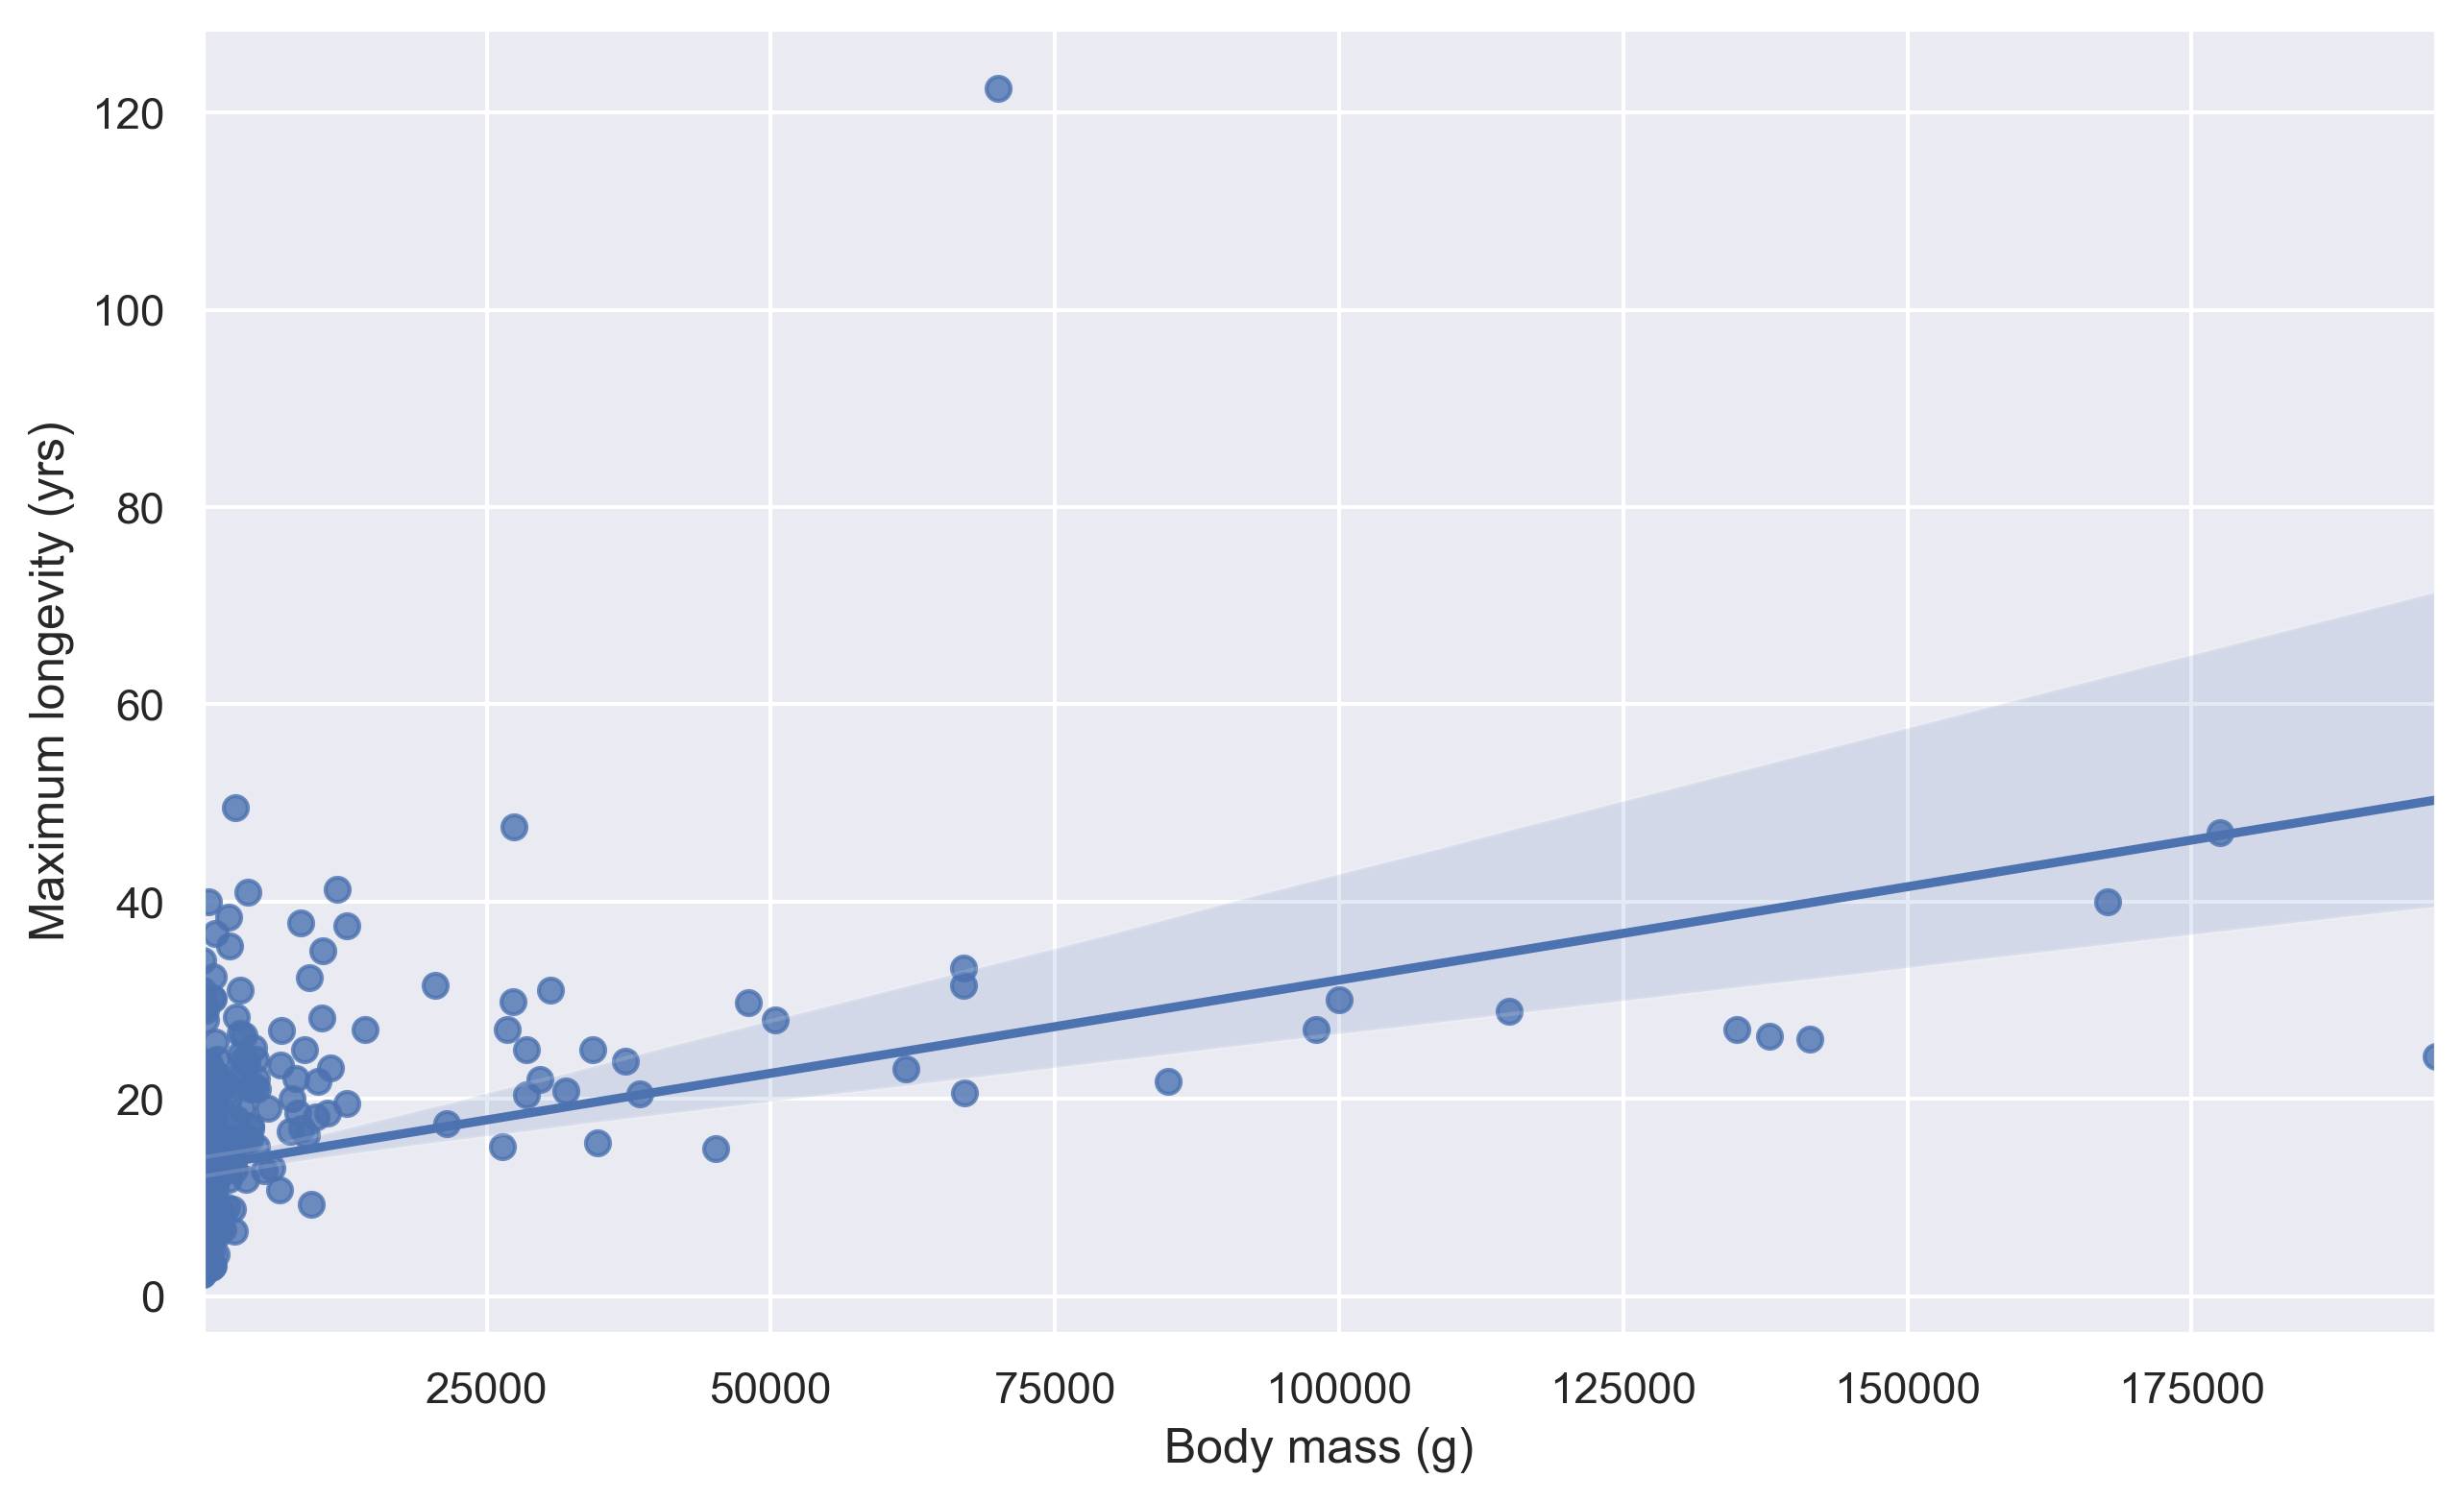

In [22]:
sns.set()
plt.figure(figsize=(10, 6), dpi=300)
sns.regplot(data['Body mass (g)'], data['Maximum longevity (yrs)'])
plt.show()

# Visualizing the Impact of Education on Annual Salary and Weekly Working Hours

<b> Use pandas to read the age_salary_hours.csv dataset </b>

In [23]:
df = pd.read_csv('Datasets/age_salary_hours.csv')
df.head()

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher


<b> Use a tree map to visualize the percentages for each education type </b>

In [24]:
import squarify

In [25]:
# calculate percentages from dataset
degrees = set(df['Education'])
percentages = []
for degree in degrees:
    percentages.append(df[df['Education'] == degree].shape[0])
percentages = np.array(percentages)
percentages = ((percentages / percentages.sum()) * 100)

In [26]:
percentages

array([ 3.4, 17.8, 47.4, 10. , 21.4])

In [27]:
# create labels
labels = [degree + f'\n({round(percentage, 1)}%)' for degree, percentage in zip(degrees, percentages)]

In [28]:
labels

['No diploma\n(3.4%)',
 'Attended college, no degree\n(17.8%)',
 "Bachelor's degree or higher\n(47.4%)",
 "Associate's degree\n(10.0%)",
 'High school diploma\n(21.4%)']

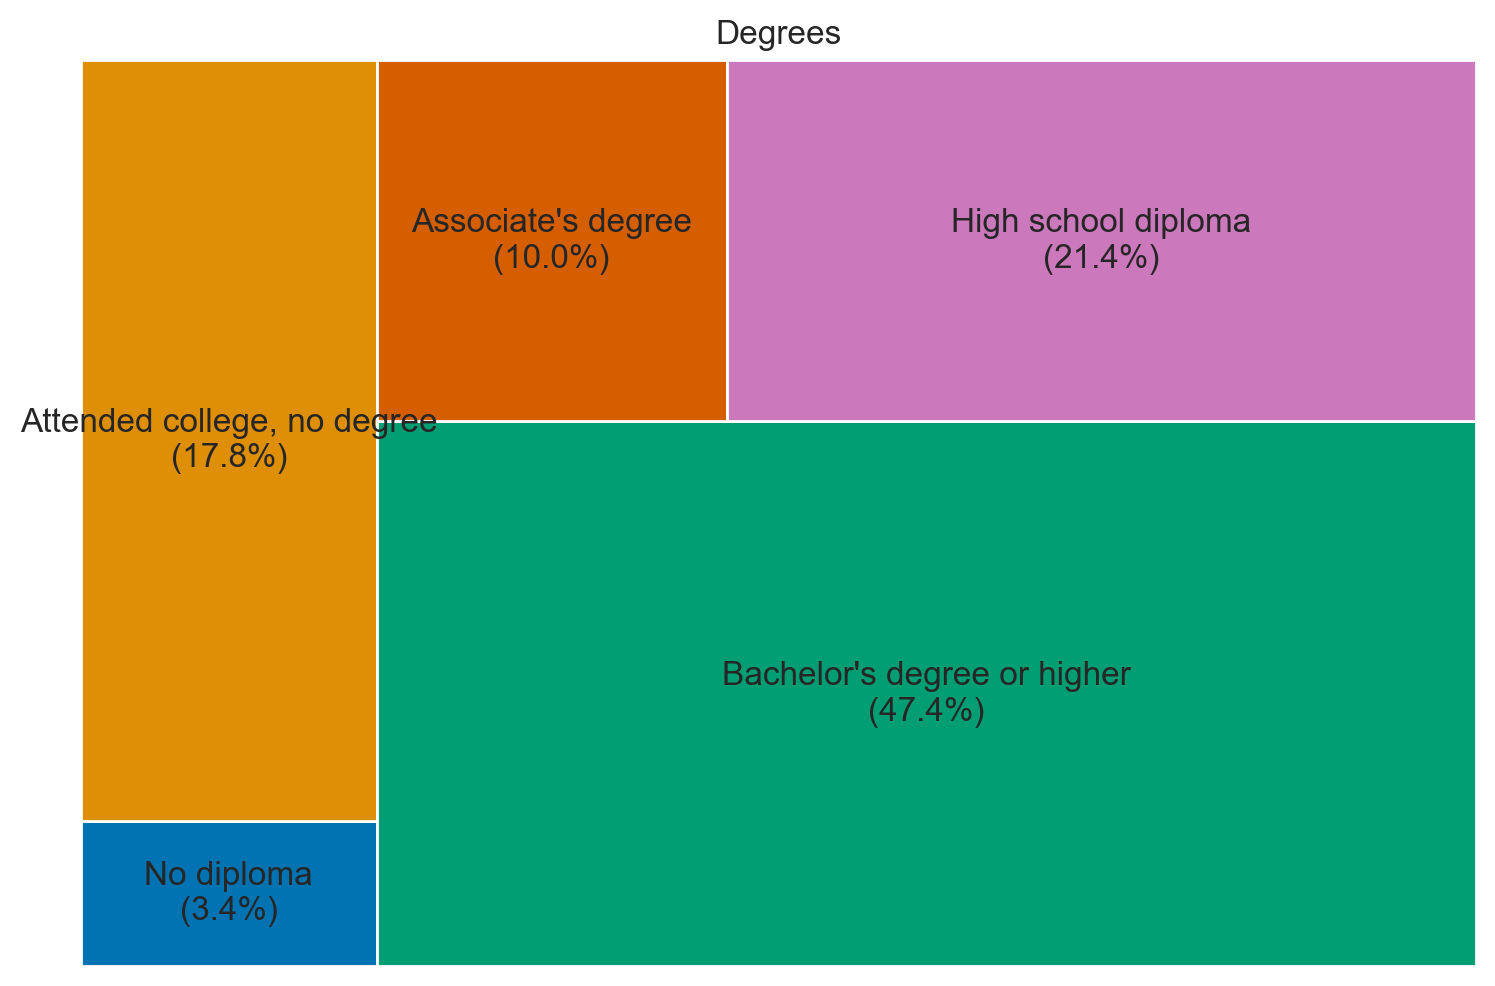

In [29]:
# create a plot
plt.figure(figsize=(9, 6), dpi=200)
squarify.plot(percentages,
             label=labels,
             color=sns.color_palette('colorblind', len(degrees)))
plt.axis('off')
plt.title('Degrees')
plt.show()

<b> Create a subplot with two rows to visualize two violin plots for the annual salary and weekly working hours </b>

In [30]:
ordered_degrees = sorted(list(degrees))
ordered_degrees = [ordered_degrees[4], ordered_degrees[3], ordered_degrees[1], ordered_degrees[0], ordered_degrees[2]]
df = df.loc[df['Age'] < 65]

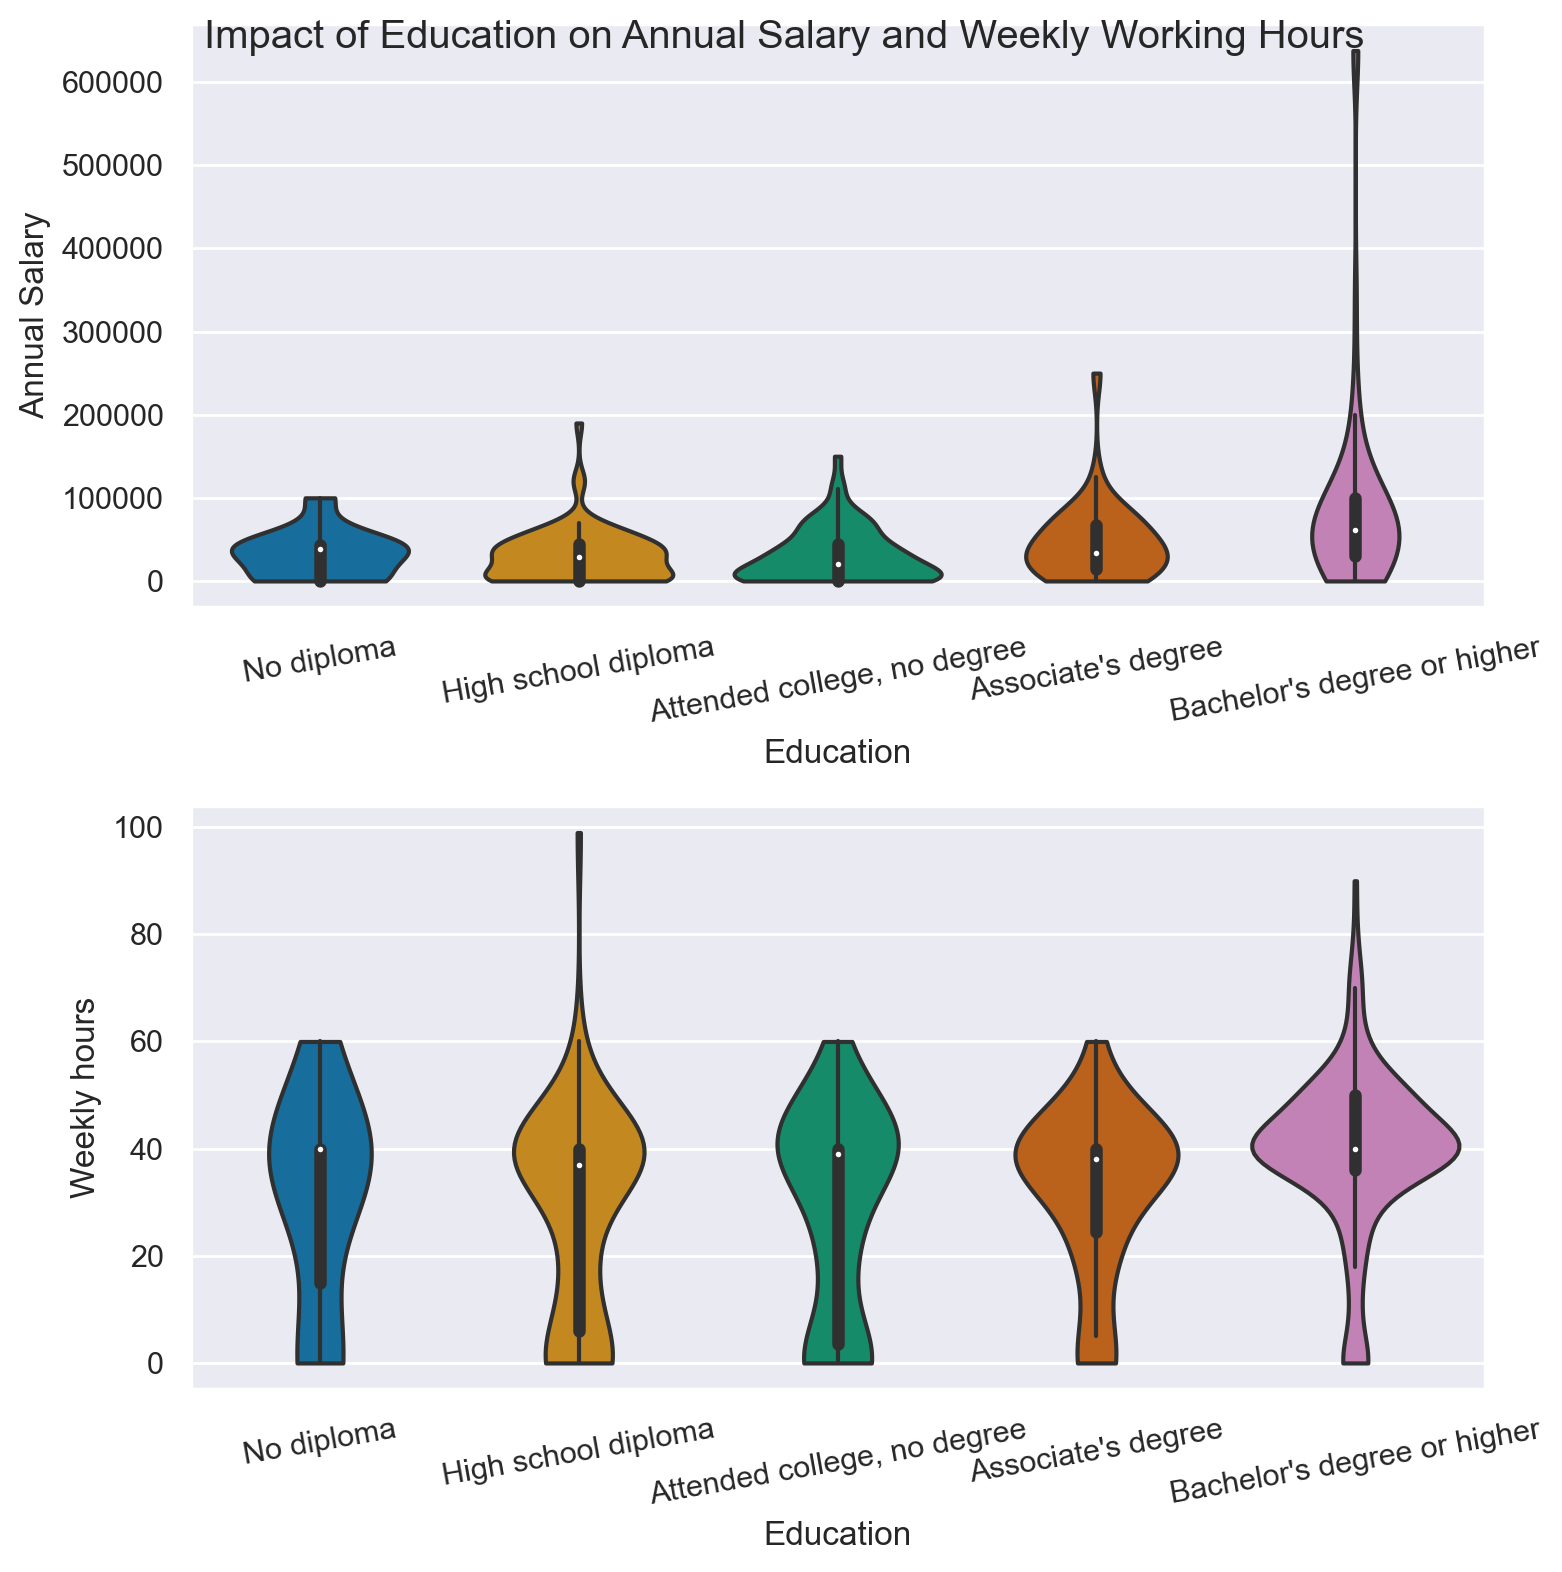

In [31]:
sns.set_palette('colorblind')
fig, ax = plt.subplots(2, 1, dpi=200, figsize=(8, 8))
sns.violinplot('Education', 'Annual Salary', data=df, cut=0, order=ordered_degrees, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=10)
sns.violinplot('Education', 'Weekly hours', data=df, cut=0, order=ordered_degrees, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=10)
plt.tight_layout()
fig.suptitle('Impact of Education on Annual Salary and Weekly Working Hours')
plt.show()